In [1]:
#import Libraries
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde as kde
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM

In [2]:
#Import Log Returns
data=pd.read_csv("returns.csv",index_col=0)

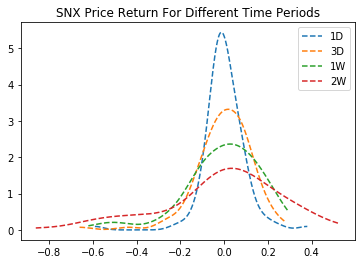

In [3]:
#KDE Plot IT
legend_text=data.columns

for col in data.columns:
    subset = data[col].copy()
    subset.dropna(inplace=True)
    kernel = kde(subset)
    subset.sort_values(inplace=True)
    x_data = np.linspace(min(subset),max(subset),10000)
    y_data = kernel.pdf(x_data )
    plt.plot(x_data,y_data,ls='--',label=col)    

plt.legend(legend_text)
plt.title("SNX Price Return For Different Time Periods")
plt.savefig("returns-plot")
plt.show()

In [4]:
#GMM Function
def gmm_model(data,gmm_cardinal):
    clf = GMM(n_components=gmm_cardinal, 
              covariance_type='spherical',
              max_iter =100,
              n_init =2,
              warm_start=True)
    gmm = clf.fit(np.array(data).reshape(-1,1))
    
    return gmm

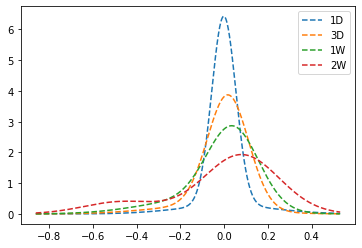

In [5]:
#shocks to predict
shocks = np.array([-0.3,-0.4,-0.5]).reshape(-1,1)
probs = list()

#model
for col in data.columns:
    subset = data[col]
    subset.dropna(inplace=True)
    subset = subset.to_numpy().reshape(-1,1)
    model = gmm_model(subset,2)
    sample = model.sample(10000)
    sample = sample[0].squeeze()
    sample.sort()
    y_data = np.exp(model.score_samples(x_data.reshape(-1,1)))
    plt.plot(x_data,y_data,ls='--',label=col)    
    probs.append(np.exp(model.score_samples(shocks))*100)
plt.legend(legend_text)
plt.show()

In [6]:
#Display Probabilities
cols = shocks.squeeze()*100
idx=legend_text.tolist()
pd.DataFrame(data=probs,columns=cols,index=idx)

,-30.0,-40.0,-50.0
1D,10.066438,4.726658,1.799712
3D,18.821326,11.530086,6.194869
1W,38.407332,24.406415,14.021298
2W,41.611129,40.876865,39.755628
